In [ ]:
#mount my google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the dataset by going into drive, then MyDrive then click the folder then "copy path"
#import basic python libraries
import pandas as pd
import numpy as np
mfdata = pd.read_csv("/content/drive/MyDrive/Applied Machine Learning/manufacturing_6G_dataset.csv")

In [ ]:
#model tools
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier #ended up not using my original DV (categorical) and switched to a continuous DV
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
#from xgboost import XGBClassifier
#import lightgbm as lgb

#visualizations
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
import plotly.figure_factory as ff

#time tools
import datetime
import time


# Understanding the Domain

Smart manufacturing is a broad category of manufacturing that employs computer-integrated manufacturing, high levels of adaptability and rapid design changes, digital information technology, and more flexible technical workforce training. Other goals sometimes include fast changes in production levels based on demand, optimization of the supply chain, efficient production and recyclability. In this concept, as smart factory has interoperable systems, multi-scale dynamic modelling and simulation, intelligent automation, strong cyber security, and networked sensors.

This dataset simulates 100,000 rows of real-time sensor data from specific instances in a manufacturing process across many different machines. Using this dataset, my goal will be to practice intentional and investigation-driven data pre-processing and EDA and then deploying/evaluating/gaining insights from various ML models.

Two of the key improvements in Industry 4.0 (aka The Fourth Industrial Revolution) are real time data collection and seamless connectivity between machines. As industry shifts toward more robotic manufacturing/assembly - it is paramount that these machines can communicate with eachother QUICKLY and leave a tangible breadcrumb trail of data that analysts can then use to even further investigate how to optimize processes and prevent failures. All of this is facilitiated with 6G networks, enabling even more speed and reliability to these connections. Compared to 5G (what we are familiar with on our cell phones)6G can connect more machines, transferring more data faster and with lower latency to even further allow factories to automate their processes. My goal as an analyst is to better understand how to work wit this data to glean insights.

# Feature Definitions and Background Information for Reference

Timestamp - the time that a sample was taken

Machine_ID - unique identifier for a specific machine

Operation_Mode - Idle/Active/Maintenance - describes the state that a machine is in in the timestamp instance. Idle represents not currently working on a task, Maintenance means it is currently being repaired and Active means it is currently manufacturing a task

Temperature_C - temperature in Celsius

Vibration_Hz - vibration of the machine at the sensor in hertz (an oscillating motion around a reference position in times per second)

Power_Consumption_kW - how many kilowatts of power this machine is consuming at a certain timestamp

Network_Latency_ms - the latency (delay that information lags during transmission across a system.)

Packet_Loss_% - a PERCENTAGE (rate) of the failure of data packets to reach their intended destination over a network, which can lead to communication disruptions, data corruption, and reduced efficiency

Quality_Control_Defect_Rate_% - percentage of items that fail to meet quality standards or specifications

Production_Speed_units_per_hr - units produced in an hour at this machine at this current timestamp

Predictive_Maintenance_Score - a numerical representation of a piece of equipment's health and likelihood of failure, derived from real-time data analysis (we do not know how this data came to this calculation)

Error_Rate_% - Error rate measures the deviation between the expected outcome and the actual outcome, indicating the reliability and accuracy of a system

Efficiency_Status - some calculation native to this synthesied data set that acts as a final categorical measure of a machines state of efficiency at that time

In [ ]:
mfdata.head()

,Timestamp,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status
0,2024-01-01 00:00:00,39,Idle,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,Low
1,2024-01-01 00:01:00,29,Active,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,Low
2,2024-01-01 00:02:00,15,Active,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,Low
3,2024-01-01 00:03:00,43,Active,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,Medium
4,2024-01-01 00:04:00,8,Idle,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,Low


In [ ]:
mfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  object 
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  object 
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              

In [ ]:
mfdata.shape

(100000, 13)

In [ ]:
#work on the DV to make it easier to handle and also more meaningful
#because I want to know when a machine is not at high status (or what gives it a high status)
#combine low and medium efficiency into "low": efficiency
mfdata['Efficiency_Status'] = mfdata['Efficiency_Status'].replace({'Low': 'Low', 'Medium': 'Low'})
mfdata.describe() #nice, that worked

,Machine_ID,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.499330,60.041458,2.549959,5.745929,25.555620,2.493418,5.008806,275.916324,0.499385,7.504100
std,14.389439,17.323238,1.414127,2.451271,14.120758,1.443273,2.883666,130.096892,0.288814,4.335896
min,1.000000,30.000138,0.100011,1.500183,1.000025,0.000026,0.000449,50.000375,0.000003,0.000112
25%,13.000000,45.031596,1.323214,3.627318,13.355118,1.245026,2.521591,162.873618,0.248166,3.750148
50%,25.000000,60.033597,2.549441,5.755460,25.536079,2.487667,5.003569,276.648922,0.499209,7.504145
75%,38.000000,74.967217,3.776459,7.860267,37.796372,3.741252,7.506127,388.812761,0.748810,11.273189
max,50.000000,89.998979,4.999974,9.999889,49.999917,4.999975,9.999900,499.996768,0.999978,14.999869


In [ ]:
#mfdata.head(30) #- just to check and make sure there are only lows and highs

In [ ]:
dummy_data = LabelEncoder() #takes your cat vars and creates dummy vars
mfdata["Operation_Mode"] = dummy_data.fit_transform(mfdata["Operation_Mode"]) #should make this 0,1,2

# Check the mapping for 'Operation_Mode'
operation_mode_mapping = dict(zip(dummy_data.classes_, dummy_data.transform(dummy_data.classes_)))
print("Operation_Mode Mapping:", operation_mode_mapping)
#ok, so active is 0, idle is 1 and maintenance is 2

Operation_Mode Mapping: {'Active': np.int64(0), 'Idle': np.int64(1), 'Maintenance': np.int64(2)}


In [ ]:
#because this is a binary var, I don't need to get super fancy with my label encoder
#i can just replace with ones and zeros
#i want high to be 1 so we can see what changes "increase" the DV from low to high, just intuitively
mfdata["Efficiency_Status"] = mfdata["Efficiency_Status"].replace({"High": 1, "Low": 0})
low_count = (mfdata["Efficiency_Status"] == 0).sum()
high_count = (mfdata["Efficiency_Status"] == 1).sum()
print("Low Count:", low_count)
print("High Count:", high_count)
#i know i have more lows (especially since I merged medium and low) so this sum check is just to make sure my recoding worked

Low Count: 97014
High Count: 2986


In [ ]:
mfdata.shape

(100000, 13)

In [ ]:
mfdata['Timestamp'] = pd.to_datetime(mfdata['Timestamp'])
mfreference_time = mfdata['Timestamp'].iloc[0]
mfdata['Time_Numeric'] = (mfdata['Timestamp'] - mfreference_time).dt.total_seconds()
print(mfdata['Time_Numeric'])

0              0.0
1             60.0
2            120.0
3            180.0
4            240.0
           ...    
99995    5999700.0
99996    5999760.0
99997    5999820.0
99998    5999880.0
99999    5999940.0
Name: Time_Numeric, Length: 100000, dtype: float64


In [ ]:
mfdata.info()
#there are no nulls so we will skip any null checks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  int64         
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

In [ ]:
mfdata.duplicated()
duplicate_rows_mfdata = mfdata[mfdata.duplicated()]
duplicate_rows_mfdata.shape #great, no duplicate rows

(0, 14)

In [ ]:
print(mfdata.isnull().sum()) #one last check to make sure this dataset is nice and clean

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
Time_Numeric                     0
dtype: int64


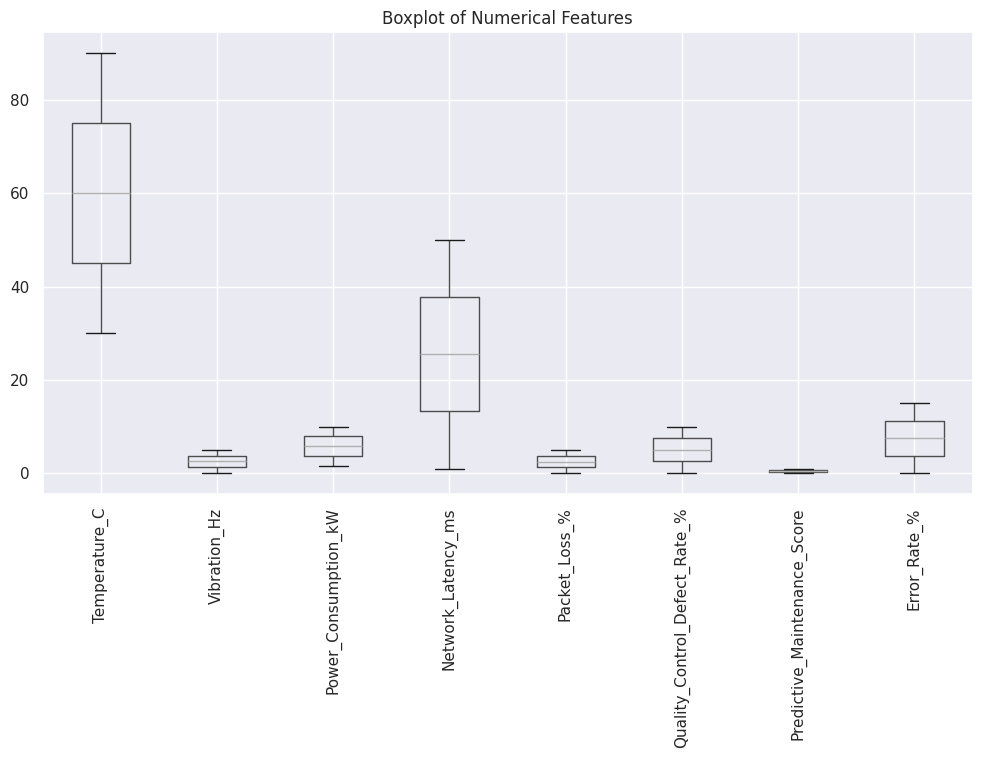

In [ ]:
#here we need to create a separate set of columns to check out with initial boxplots
#this is because time numeric is SO big that it makes the other boxplots unreadable...
#machine ID doesn't matter to graph, i dont need to graph binary/cat vars and production speed is too big and should be on its own
mfdata_to_boxplot = mfdata.drop(columns=['Time_Numeric', 'Efficiency_Status', 'Operation_Mode','Machine_ID', 'Production_Speed_units_per_hr'])
mfdata_to_boxplot.boxplot(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

<Axes: >

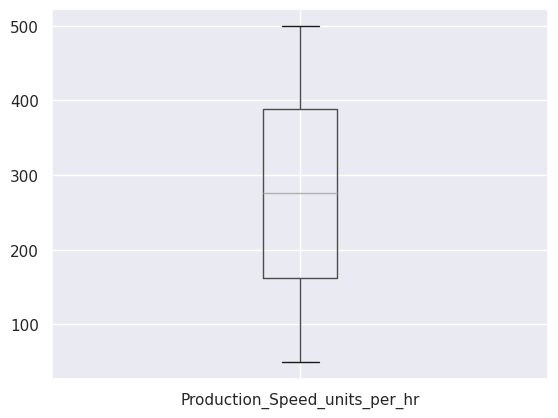

In [ ]:
mfdata.boxplot('Production_Speed_units_per_hr')

<Axes: >

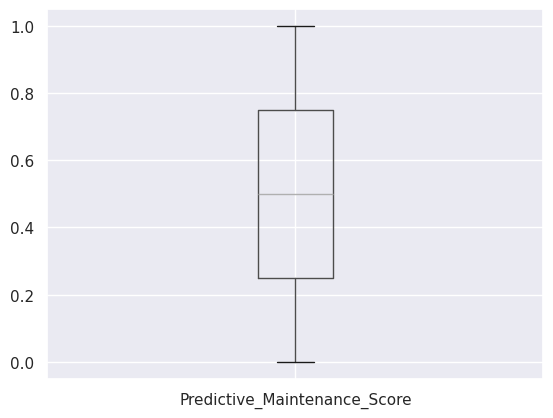

In [ ]:
mfdata.boxplot("Predictive_Maintenance_Score")
#ok, so this is a range from 0-1

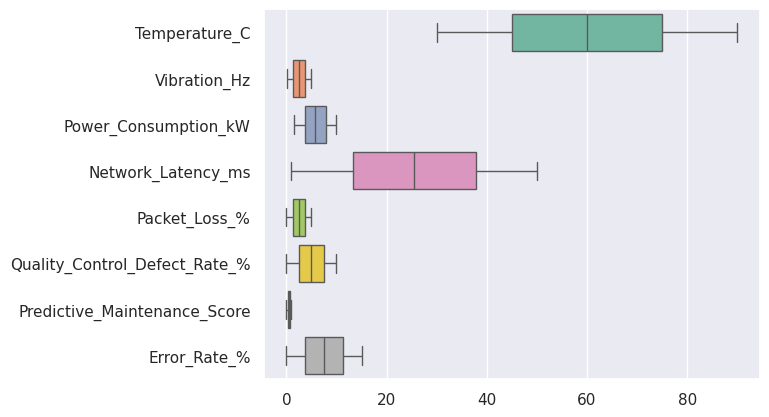

In [ ]:
#another, nicer looking way to visualize these
#so far, it's not looking like there are any detectable outliers here (no dots)
snsboxplot = sns.boxplot(data=mfdata_to_boxplot, orient="h", palette="Set2")
#we can see that there is a wide range of temperatures and network latencies, good to look into later

Low Count: 97014
High Count: 2986


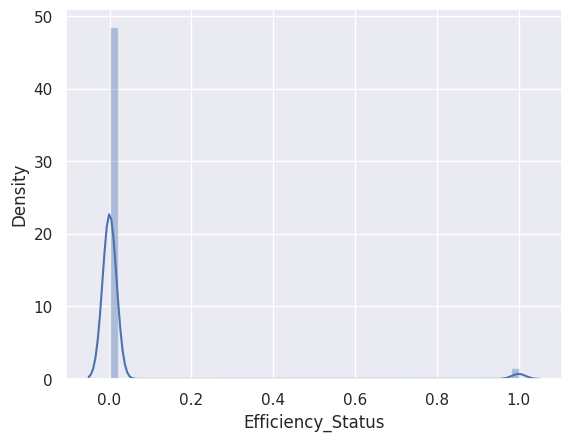

In [ ]:
sns.distplot(mfdata["Efficiency_Status"])
#Ha! I love using numeric-focused plots to look at binary data - but it does tell us a story
#there are MANY MANY more low's than highs (as known from the dataset)
#this will create issues down the line because ML models bias toward the majority class (usually)
#more on this later
print("Low Count:", low_count) #just for reminder
print("High Count:", high_count) #this means that we have >32X more lows than hi's

<Axes: xlabel='Error_Rate_%', ylabel='Density'>

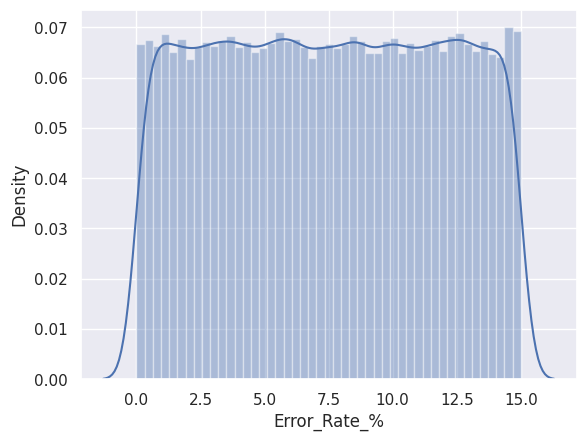

In [ ]:
sns.distplot(mfdata["Error_Rate_%"]) #ok, pretty even here

<Axes: xlabel='Network_Latency_ms', ylabel='Density'>

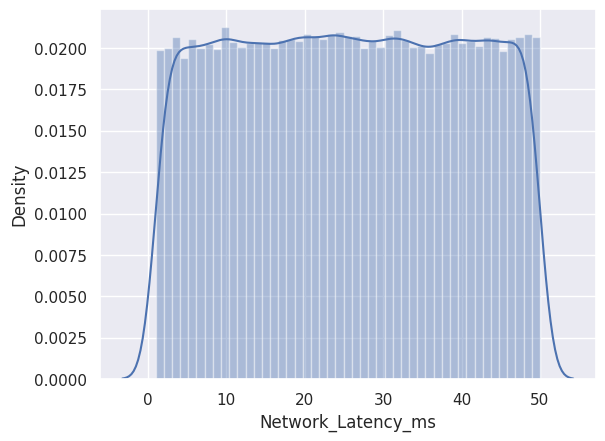

In [ ]:
sns.distplot(mfdata["Network_Latency_ms"]) #same here - I'm looking for imbalanced trends

<Axes: xlabel='Operation_Mode', ylabel='Density'>

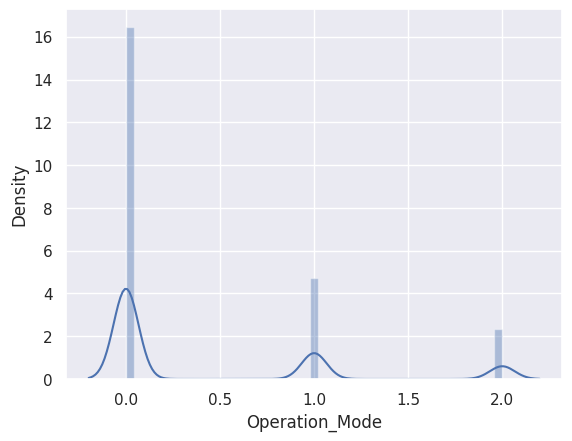

In [ ]:
sns.distplot(mfdata["Operation_Mode"])
#here we go, something more to look into
#remember 0 is Active, 1 is Idle and 2 is Maintanence
#so most machines are active most of the time, with the fewest being in maintenance
#this could become something interesting to look into later - aka "what factors make a machine go into maintenance"

<Axes: xlabel='Production_Speed_units_per_hr', ylabel='Density'>

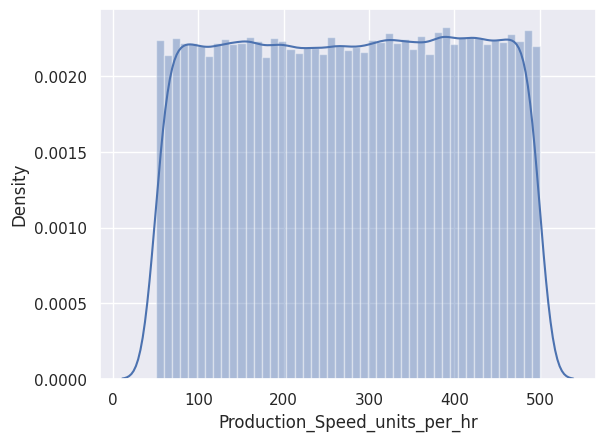

In [ ]:
sns.distplot(mfdata["Production_Speed_units_per_hr"]) #very similar again

In [ ]:
mfdata= mfdata.drop(['Timestamp'], axis=1)
mfdata.head(5)

,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status,Time_Numeric
0,39,1,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,0,0.0
1,29,0,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,0,60.0
2,15,0,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,0,120.0
3,43,0,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,0,180.0
4,8,1,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,0,240.0


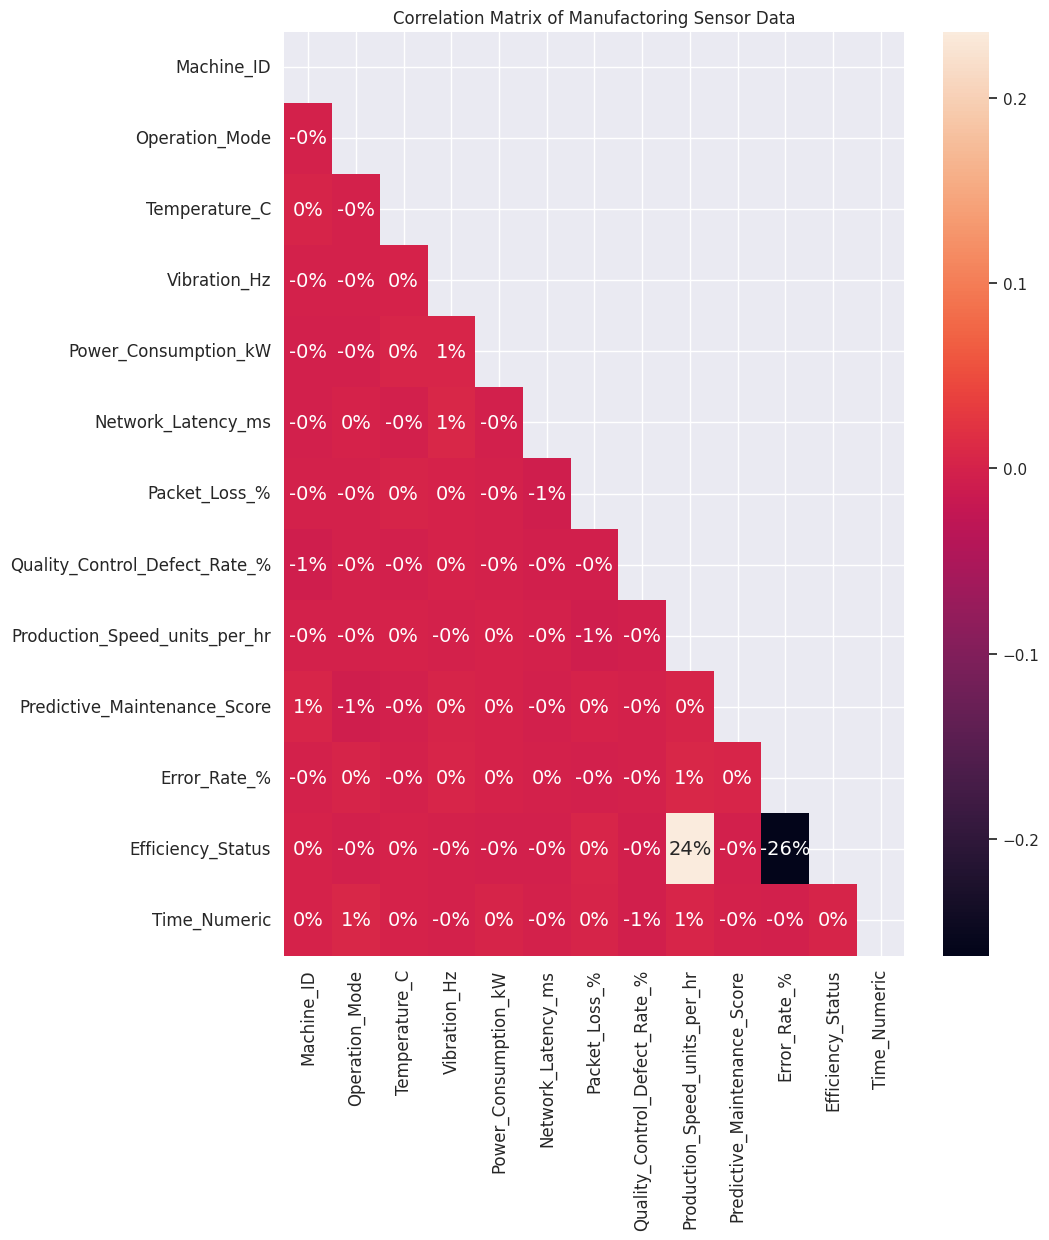

In [ ]:
Correlation  = mfdata.corr() #heat map of correlation chart

mask = np.zeros_like(Correlation)
mask_check = np.triu_indices_from(mask)
mask[mask_check] = True

plt.figure(figsize = (10,12))
sns.heatmap(Correlation, mask = mask, annot = True, fmt = "0.0%", annot_kws = {"size" : "14"})
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.title("Correlation Matrix of Manufactoring Sensor Data")
plt.show()

In [ ]:
#ok - well this is disappointing, in this fake dataset, Efficiency Status is clearly just a handmade factor of
#production units and error rate. That is so boring. That is an elementary level insight and I'm not interested in it
#because it just makes all the other actual sensor data points useless to the model and my practice as a coder
#I think I want to eliminate the efficiency status and look into the error rate %
#this might give me a more analytical, deeper look into the actual sensor data columns and less
#of just a gradeschool calculation of "error is bad and making things fast is good" metric called "Efficiency Status"

In [ ]:
#let's just see how this looks without this variable
mfdata_noeff= mfdata.drop(['Efficiency_Status'], axis=1)
mfdata_noeff.head(5)

,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Time_Numeric
0,39,1,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,0.0
1,29,0,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,60.0
2,15,0,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,120.0
3,43,0,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,180.0
4,8,1,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,240.0


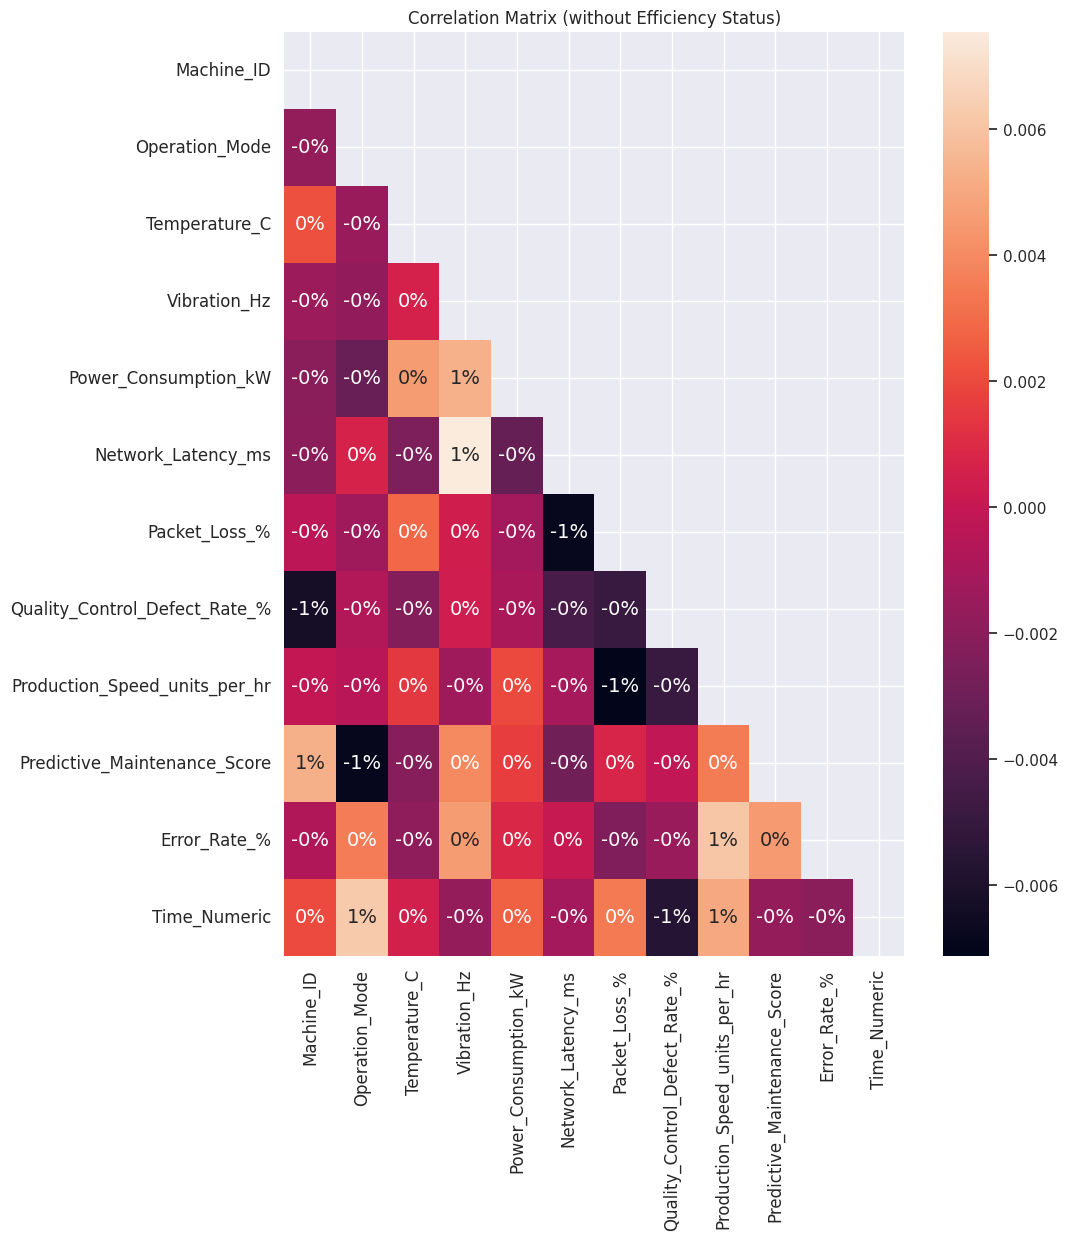

In [ ]:
Correlation2  = mfdata_noeff.corr() #heat map of correlation chart

mask = np.zeros_like(Correlation2)
mask_check = np.triu_indices_from(mask)
mask[mask_check] = True

plt.figure(figsize = (10,12))
sns.heatmap(Correlation2, mask = mask, annot = True, fmt = "0.0%", annot_kws = {"size" : "14"})
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.title("Correlation Matrix (without Efficiency Status)")
plt.show()
#much better, we can actually get a little nuance in the data to see how these
#variables might actually be affecting the error rate instead
#so from hereon out, I will make error_rate_% my new DV because the goal here is for me to learn
#by using models to look deep into insights i might not have been able to parse out without them...
#not to do a simple calculation of 2 variables to get a binary "good or bad" outcome
#so, in that spirit - let's set forth now investigating what causes ERRORS in manufacturing

In [ ]:
#drop rows to reduce the size to 47522 rows (1 month of manufacturing data via timestamp)
#doing this so i can get more practice and spend less time computing, now that I know this dataset is weak

mfdata1=mfdata_noeff.iloc[:47522]
#mfdata1.head(10)
print(mfdata1.shape)

(47522, 12)


In [ ]:
#this plot was useless because there was no correlation and too many data points

#fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(mfdata1['Temperature_C'], mfdata1['Error_Rate_%'])
#ax.set_xlabel('Temperature_C')
#ax.set_ylabel('Error_Rate_%')
#plt.show()

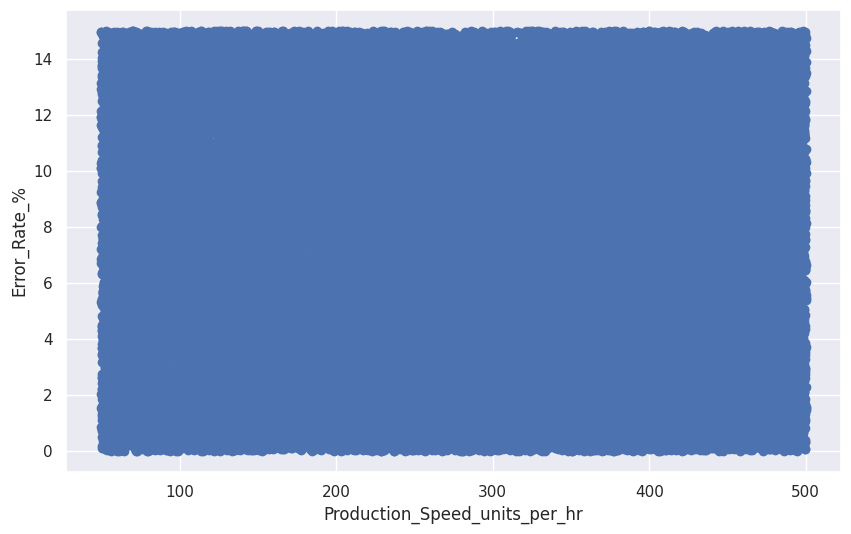

In [ ]:
#aaaaand so was this one
#this is happening because there are SO many data points and the correlations are too low
#it is clear that scatterplots will not tell any useful story here, so I will disenage and look into the numbers

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(mfdata1['Production_Speed_units_per_hr'], mfdata1['Error_Rate_%'])
ax.set_xlabel('Production_Speed_units_per_hr')
ax.set_ylabel('Error_Rate_%')
plt.show()

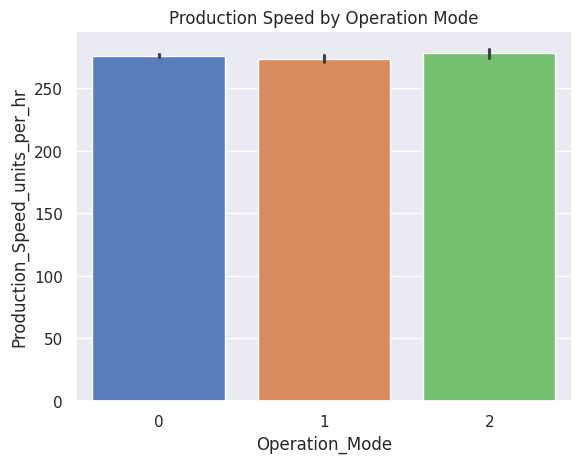

In [ ]:
sns.barplot(x="Operation_Mode", y="Production_Speed_units_per_hr", data=mfdata1, palette="muted")
plt.title("Production Speed by Operation Mode")
plt.show()

#ok, it is very clear now -- THIS IS A GARBAGE DATASET
#how could the production speed (units assembled per hour) be the same between
#the different modes (active, idle and maintenance)
#i will progress but only to complete this phase and then pick a new dataset
#that's a huge bummer because I really wanted to look into the different factors that made
#machines (and even different machines in the facility!) function better/worse
#but it is clear this is just a completely homogenous dataset with very few REALISTIC insights to be gleaned

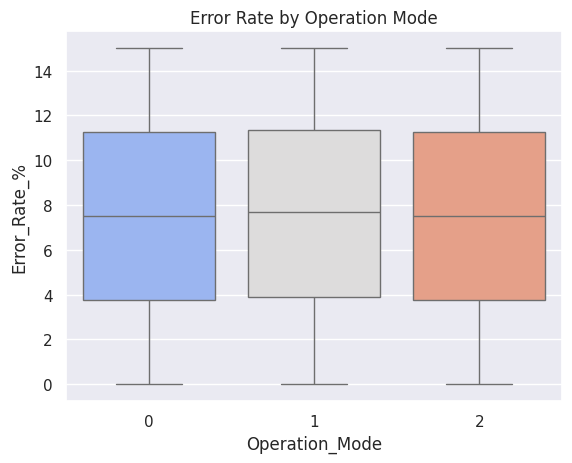

In [ ]:
sns.boxplot(x="Operation_Mode", y="Error_Rate_%", data=mfdata1, palette="coolwarm")
plt.title("Error Rate by Operation Mode")
plt.show()
#exactly - machines are making the same amount of errors (EXACTLY) when they are
#active as when they are in maintenance - this is ridiculous

In [ ]:
#create grouped shorthand for my ivs and dv
IVs = mfdata1.drop(["Error_Rate_%", "Machine_ID", "Predictive_Maintenance_Score"], axis=1)#make my independent variables
 #(ensure I get rid of my DV and also the ID var for the machine#)
 #make sure to use "IVs" in NON sfm versions of models
DV = mfdata1["Error_Rate_%"]                #make my dependent variable for all my future work

In [ ]:
#ive got crazy-different scales on my IV's (especially my time variable)
#so i will standardize them
Standardized = StandardScaler()
IVs_standard = Standardized.fit_transform(IVs)

In [ ]:
mfdata1.shape #I only have 11 IV's so I would normally not use PCA or feature selection
#BUT - there is so much noise and so little correlation that I do want to investigate for which features to use

(47522, 12)

In [ ]:
#next I want to use selectfrommodel to see if I can select the most relevant features for my final model
#NOTE - WE WILL RUN A VERSION WITH THESE SELECTED FEATURES AND ONE WITHOUT TO SEE IF SFM PERFORMS BETTER
#i'm using sfm over PCA because sfm is a supervised learning method and can keep my target variable in mind
#it can also handle non-linearity (which I want because i saw such low correlation scores)
#and maybe, just MAYBE I can get some interesting insights out of this
#which is another good reason for SFM because it provides feature importance scores that make things easier to interpret

#but we're not cavemen - it would be silly to just assume that a certain model will be best for sfm
#however, I do not have the CPU to do this for everything (randomforest was incredibly slow) so I only chose a few of the faster models

#define the models to be evaluated
models = {
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100),
    'LinearRegression': LinearRegression(),
   'XGBoost': XGBRegressor(n_estimators=100)
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
   scores = cross_val_score(model, IVs_standard, DV, cv=5, scoring='neg_mean_squared_error') #i chose this to intuitively make the larger numbers better models for if we want to look at the numbers
   results[name] = scores.mean()

#select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

#fit the best model
best_model.fit(IVs, DV)

#use SelectFromModel with the best model
sfm = SelectFromModel(best_model, threshold=0.01)
X_selected = sfm.transform(IVs) #use this in your sfm versions of models

print(f"Best model: {best_model_name}")
#hilarious - the best model is linear regression - this dataset is so boring! ;)

Best model: LinearRegression


In [ ]:
#print(results) #this shows us the actual neg MSE numbers of the models we tested, with larger numbers being better
#we can see here that Linear Regression was in 1st place, then GB then XGB was last

{'GradientBoosting': np.float64(-18.95175004502164), 'LinearRegression': np.float64(-18.750375274921378), 'XGBoost': np.float64(-20.240003023640977)}


In [ ]:
#print(X_selected) #not necessary but cool to see if you care
print(f"Selected features shape: {X_selected.shape}") #tell sus how many it kept (column count)
#get the boolean mask of selected features
selected_features_mask = sfm.get_support()

#get the names of the selected columns by putting the column names to the chosen features
selected_columns = IVs.columns[selected_features_mask]

print(f"Selected columns: {selected_columns}") #a pretty way to read what the model decided to keep
#Linear Regression selected only 2 columns - Operation_Mode and Vibration_Hz
#it will be interesting to see if the sfm features or ALL features will perform better in the final model phase

Selected features shape: (47522, 2)
Selected columns: Index(['Operation_Mode', 'Vibration_Hz'], dtype='object')


In [ ]:
#ok - let's run the model once with the SFM features and once with all the columns - hjust as practice and to see which is better
#i will want to use the same random states (seeds) in both so that any difference in performance is due to the feature selection and not the seed

In [ ]:
#create my training and testing split FOR NON SFM MODEL
IVs_train, IVs_test, DV_train, DV_test = train_test_split(IVs_standard, DV, test_size = 0.3, random_state = 6) #use same seed in both
#this is a 70/30 split

In [ ]:
#create my training and testing split FOR SFM MODEL
IVs_train_sfm, IVs_test_sfm, DV_train_sfm, DV_test_sfm = train_test_split(X_selected, DV, test_size = 0.3, random_state = 6) #use same seed in both
#remember, X_Selected was already built on the standardized IVs so it is standardized already
#this is a 70/30 split

In [ ]:
# Define a custom scorer for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# SFM model selection with 5-fold cross-validation
models_results_sfm = {}

for name, model in models.items():  # references the first list of models from before
    # Perform 5-fold cross-validation for MSE
    mse_scores = cross_val_score(model, IVs_train_sfm, DV_train_sfm, cv=5, scoring=mse_scorer)
    mse_mean = -np.mean(mse_scores)  # Negate because greater_is_better=False

    # Perform 5-fold cross-validation for R2
    r2_scores = cross_val_score(model, IVs_train_sfm, DV_train_sfm, cv=5, scoring='r2')
    r2_mean = np.mean(r2_scores)

    models_results_sfm[name] = {'MSE': mse_mean, 'R2': r2_mean}
    print(f"{name}: MSE = {mse_mean:.4f}, R2 = {r2_mean:.4f}")
#wow this run fast - nice to only be using 2 columns
#knowing that lower MSE's are better (smaller error between what we predicted and what was true)
#and knowing that higher R2's are better (higher amount of variance of DV is predictable based on IV's)
# we can see here that Linear Regression is the best model - it has the lowest MSE and the highest R2
#the other models actually perform worse than a horizontal line (basically just the mean of the target variable)
#so linear regression is our choice for the SFM model

GradientBoosting: MSE = 18.7679, R2 = -0.0034
LinearRegression: MSE = 18.7127, R2 = -0.0005
XGBoost: MSE = 19.1066, R2 = -0.0215


In [ ]:
models_results = {}

for name, model in models.items():  # references the first list of models from before
    # Perform 5-fold cross-validation for MSE
    mse_scores = cross_val_score(model, IVs_train, DV_train, cv=5, scoring=mse_scorer)
    mse_mean = -np.mean(mse_scores)  # Negate because greater_is_better=False

    # Perform 5-fold cross-validation for R2
    r2_scores = cross_val_score(model, IVs_train, DV_train, cv=5, scoring='r2')
    r2_mean = np.mean(r2_scores)

    models_results[name] = {'MSE': mse_mean, 'R2': r2_mean}
    print(f"{name}: MSE = {mse_mean:.4f}, R2 = {r2_mean:.4f}")

GradientBoosting: MSE = 18.7981, R2 = -0.0050
LinearRegression: MSE = 18.7182, R2 = -0.0008
XGBoost: MSE = 20.2352, R2 = -0.0819


# MODEL COMPARISON
From these two versions of model applications (with SFM and without SFM) we can see that a simple Linear Regression is the best performing, although there is almost no correlation between any of the variables and the target. This is most likely happening becuase it is a poorly simulated fake dataset from Kaggle. However, we can see that the SFM model performs SLIGHTLY better, only using Operation_Mode and Vibration_Hz -- for the purpose of practicing the code.

In [ ]:
#so we will progress with just the SFM model using linear regression

# Fit the linear regression model
final_model = LinearRegression()
final_model.fit(IVs_train_sfm, DV_train_sfm)

# Predict on the test data
y_pred = model.predict(IVs_test_sfm)

# Get the coefficients
final_coefficients = final_model.coef_

# Manually set the column names
final_feature_names = selected_columns  #we have to use the selected_columns object from when we went back and renamed the columns in out SFM X_selected set of IV's

# Create a DataFrame to display coefficients
final_coef_df = pd.DataFrame(final_coefficients, index=final_feature_names, columns=['Coefficient'])
print(final_coef_df)

#here we see that operation mode had a higher impact on error_rate_% than the vibration
#...which is ridiculous - a machine shoul dmake ZERO errors in IDLE or Maintenance mode
#so this coefficient should be way higher
#but remember, we also saw that the values for error were almost identical for all modes in the EDA...just bad data

                Coefficient
Operation_Mode     0.018683
Vibration_Hz       0.014350


In [ ]:
#Ok - let's wrap up this dumpter fire by running some proper linear regression
#statsmodels has a version I like that gives plenty of useful output insights

#first I have to add a constant to the features for statsmodels so that the graph isnt forced through (0,0) - this seems silly I have to do this but I do
IVs_train_sfm_const = sm.add_constant(IVs_train_sfm)

#fit the model with linear regression in sm
sm_model = sm.OLS(DV_train_sfm, IVs_train_sfm_const).fit()

#remember x1 (from our SFM) is Operation Mode
#and x2 (from our SFM) is Vibration_Hz

# Get the summary of the model
print(sm_model.summary())

#we have virtually no variance explained, awful coefficients and terrible diagnostic tests
#it's official - this data has no discernable patterns using my methods

                            OLS Regression Results                            
Dep. Variable:           Error_Rate_%   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5021
Date:                Mon, 31 Mar 2025   Prob (F-statistic):              0.605
Time:                        18:29:19   Log-Likelihood:                -95915.
No. Observations:               33265   AIC:                         1.918e+05
Df Residuals:                   33262   BIC:                         1.919e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4791      0.051    147.422      0.0

# Business Insights

I would not feel comfortable looking at this data from a "recommendations" standpoint because all models fit so poorly and no variables seem to have any effect on the DV and there are clear issues in the data integrity (see comments above). This became a very good practice in the methods, but with no actionable insights.